In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [3]:
random_seed = 1
x_length = 5
maximum_markov_chain_length = 50
bound_enforcing_method = "not_clipping"

# Notes
    - seems like the "better" methods don't explore enough at the start
    - step size control makes big difference (clipp and initialisation)
    - fancy temperature annealing doesn't help - need to read literature (maybe coeff of variation type thing would be better?)

# With Cholesky

In [4]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", maximum_archive_length=100, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000, with_restarts=False, bound_enforcing_method=bound_enforcing_method)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

x_result = [ 356.8459903   416.8797612   466.11200473  435.73166936 -323.51672199] 
 objective_result = -1345.9618492006011 
 number of function evaluations = 10008


# With diagonal thing

In [5]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  annealing_schedule = "adaptive_cooling", 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", maximum_archive_length=100, step_size_initialisation_fraction_of_range=0.5,
                                  maximum_markov_chain_length=maximum_markov_chain_length, with_restarts=False, bound_enforcing_method=bound_enforcing_method,
                                   maximum_function_evaluations=10000)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

archive_x_diag = np.array([x_archive for x_archive, f_archive in rana_2d_diag.archive])
archive_f_diag = np.array([f_archive for x_archive, f_archive in rana_2d_diag.archive])

D:\Documents\Work\2020\Cambridge MLMI\MLMI\Practical Optimisation\Assignment 2\SimulatedAnealing.py:136: RuntimeWarning: overflow encountered in exp
  probability_of_accept = np.exp(-delta_objective / (self.temperature*np.sqrt(np.sum(delta_x**2))))


x_result = [-363.11640495 -314.75906421  499.99895838 -137.22487611  451.80141363] 
 objective_result = -921.0164416719598 
 number of function evaluations = 10001


In [6]:
rana_2d_diag.step_size_matrix

array([[4.41781882e-010, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 8.91288228e-009, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.77478210e-013,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        8.17262464e-009, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.06869102e-220]])

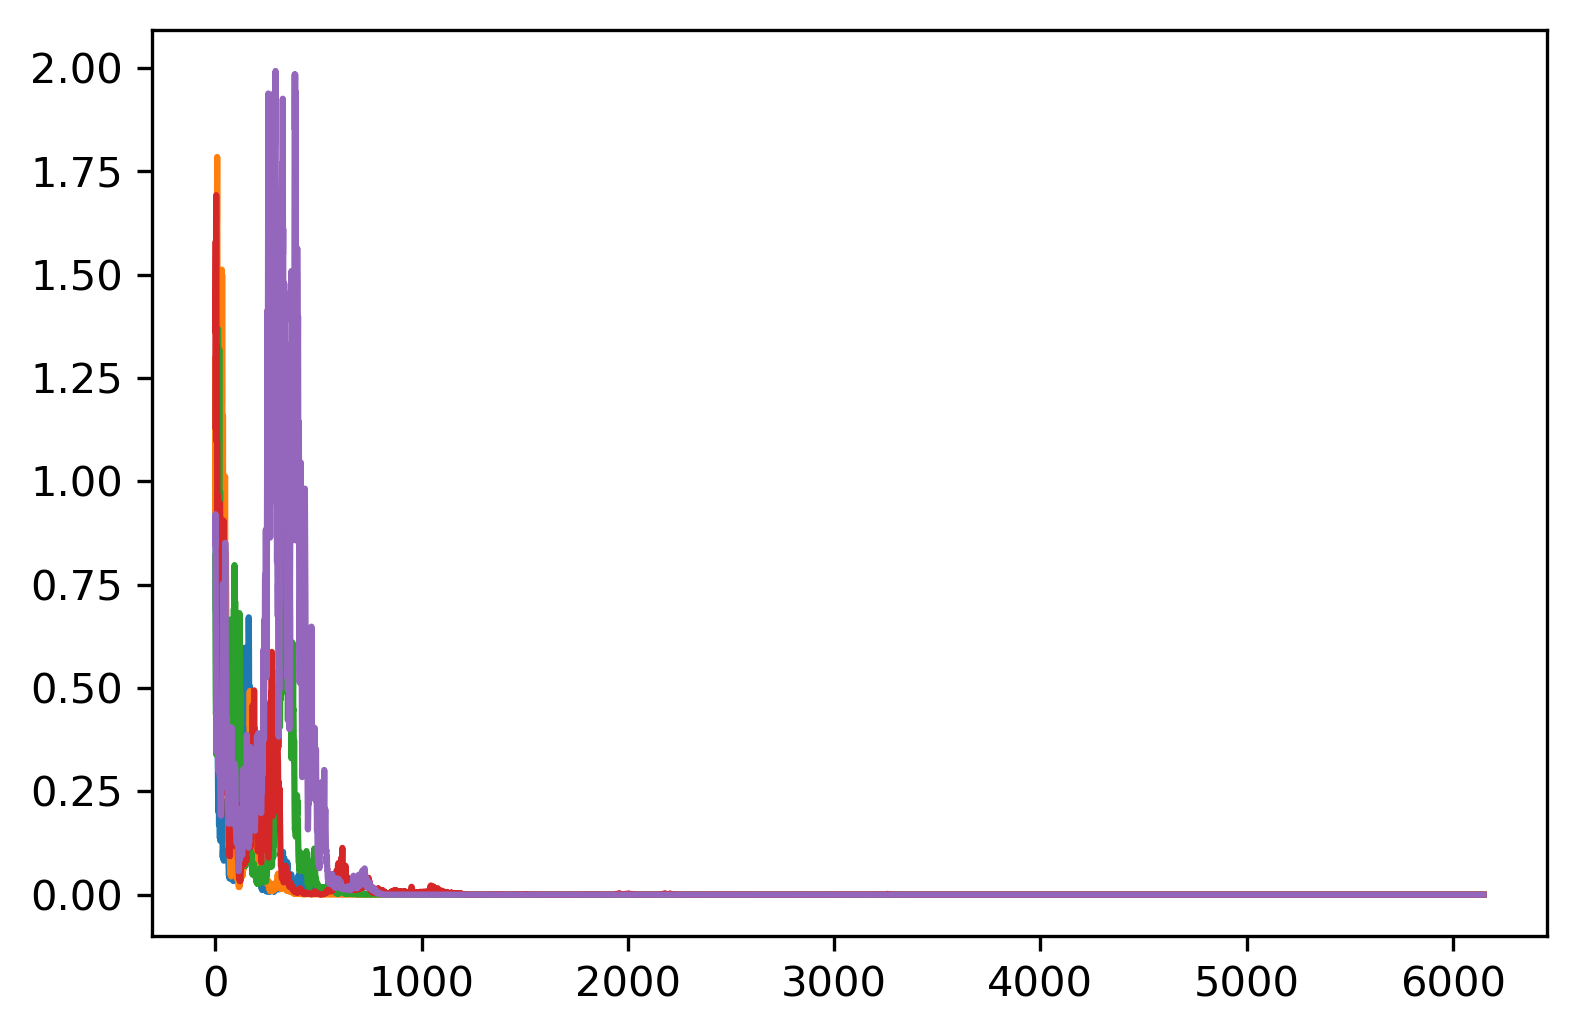

In [7]:
plt.plot(rana_2d_diag.step_size_matrix_history)

# Simple

In [8]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100, maximum_markov_chain_length=maximum_markov_chain_length, 
                             bound_enforcing_method=bound_enforcing_method,
                                   maximum_function_evaluations=10000)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

archive_x = np.array([x_archive for x_archive, f_archive in rana_2d.archive])
archive_f = np.array([f_archive for x_archive, f_archive in rana_2d.archive])

x_result = [-384.53461626 -338.99734305  391.95694459  444.36137126  -93.88941599] 
 objective_result = -1343.8932205732838 
 number of function evaluations = 10012


# Reults

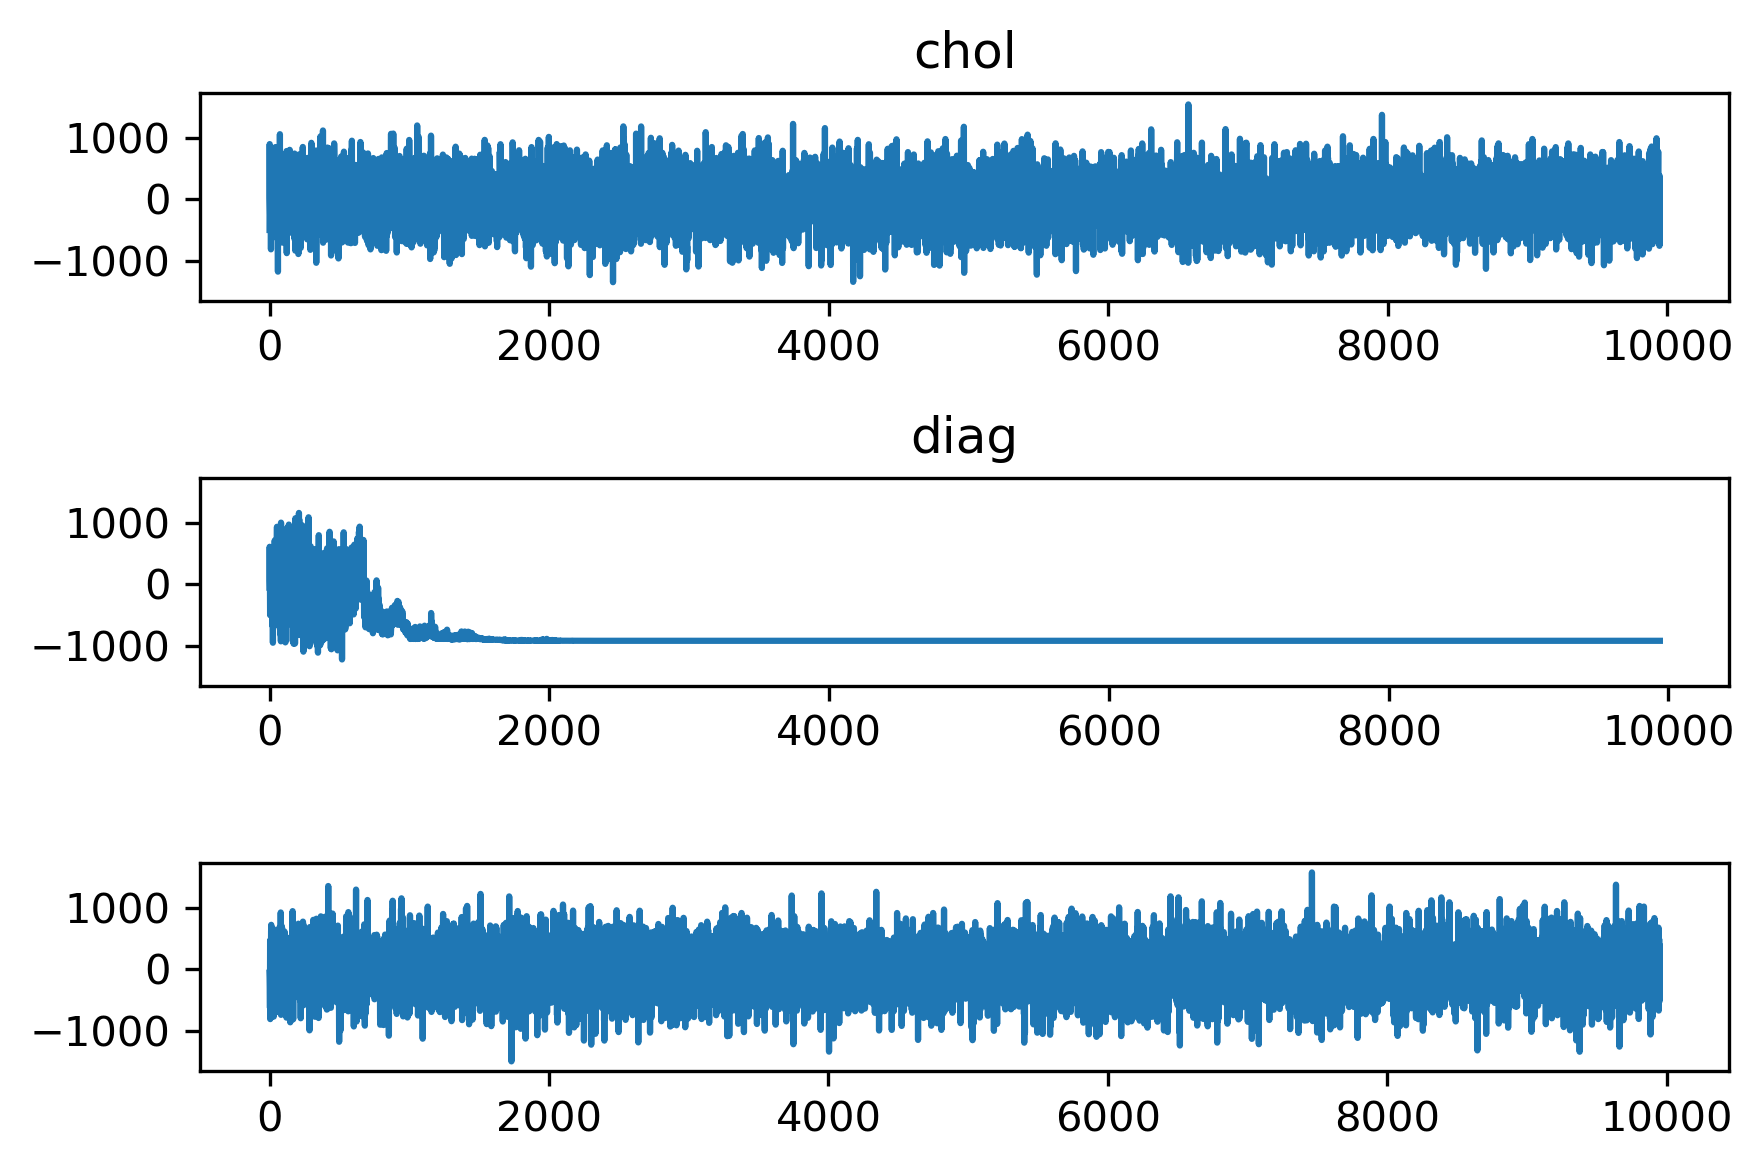

In [9]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

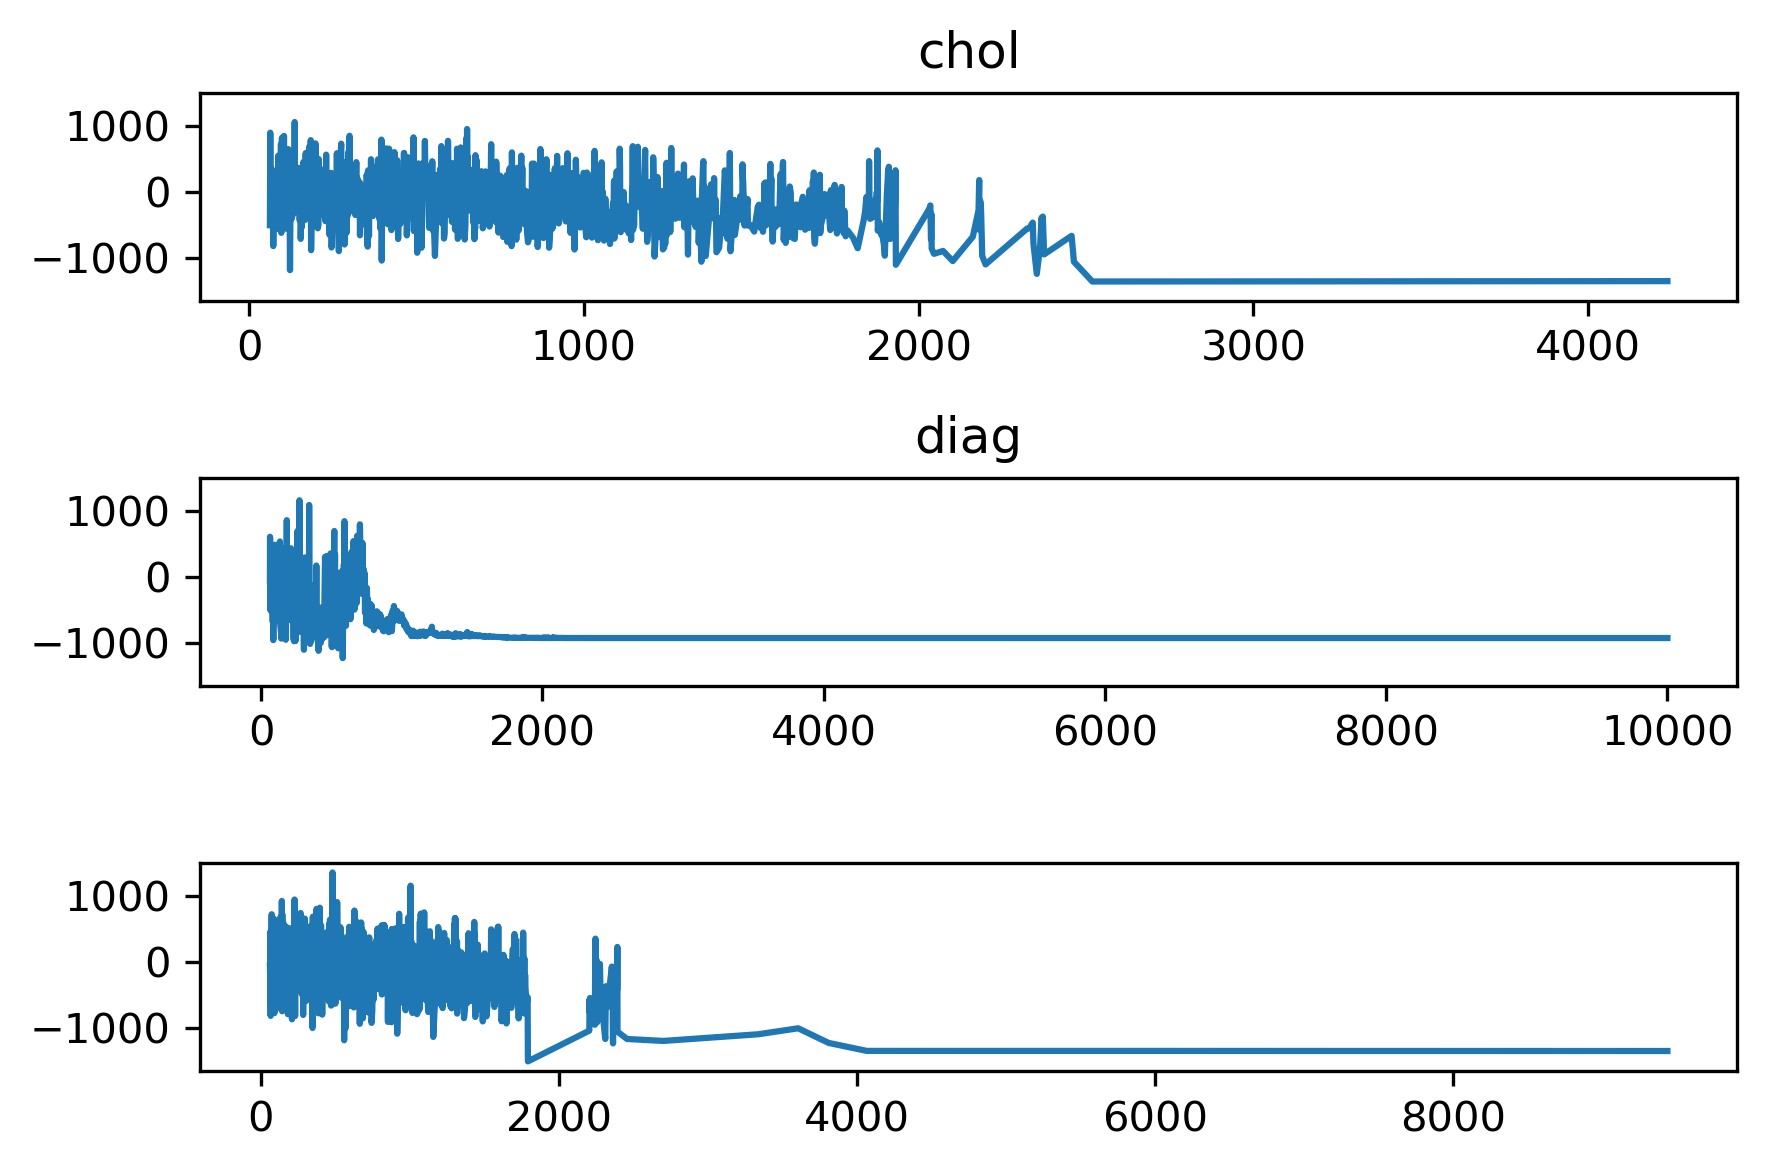

In [10]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.accepted_objective_history_array[:, 1], rana_2d_chol.accepted_objective_history_array[:, 0], label="chol")
axs[1].plot(rana_2d_diag.accepted_objective_history_array[:, 1], rana_2d_diag.accepted_objective_history_array[:, 0], label="diag")
axs[2].plot(rana_2d.accepted_objective_history_array[:, 1], rana_2d.accepted_objective_history_array[:, 0], label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

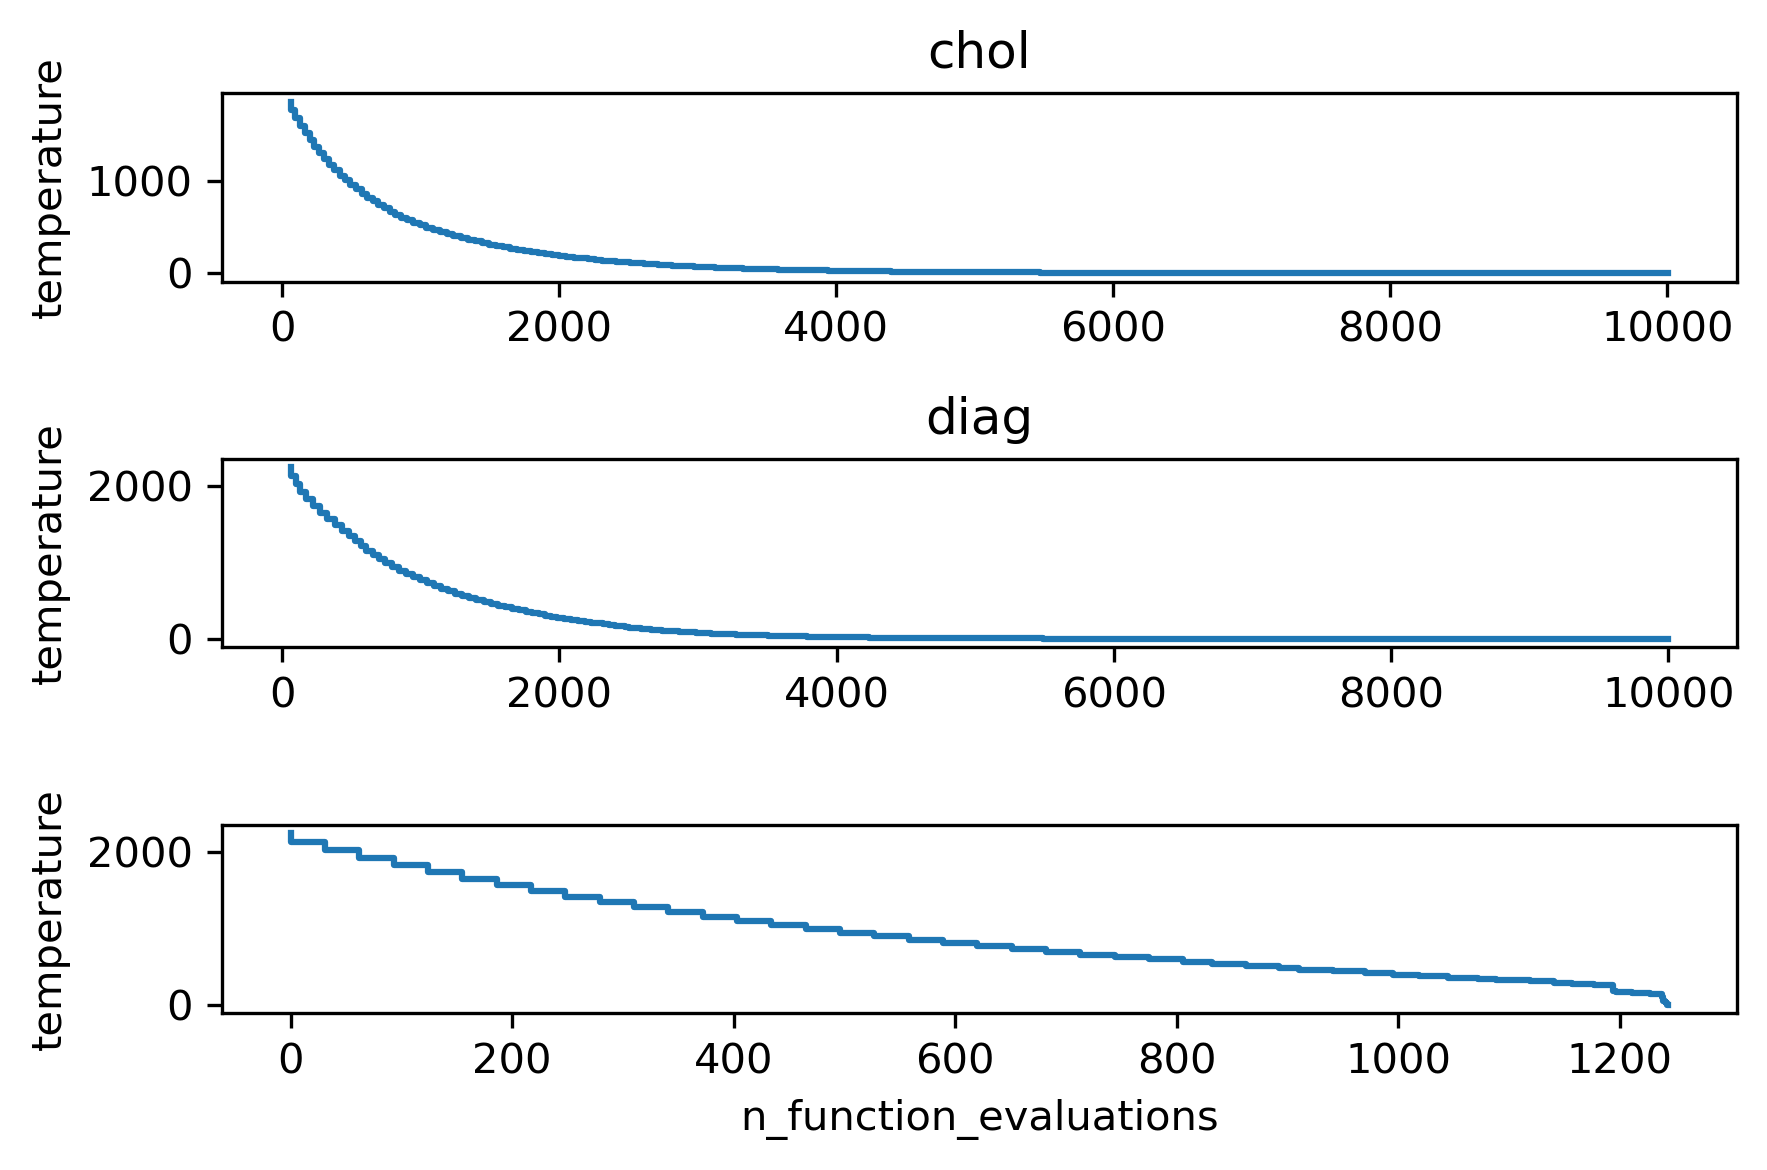

In [11]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].step(temp_history_chol[:, 2], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].step(temp_history_diag[:, 2], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].step(temp_history[:, 1], temp_history[:, 0], label="simple")


axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("temperature")
axs[1].set_ylabel("temperature")
axs[2].set_ylabel("temperature")
axs[2].set_xlabel("n_function_evaluations")
plt.tight_layout()

Text(112.91666666666667, 0.5, 'probability')

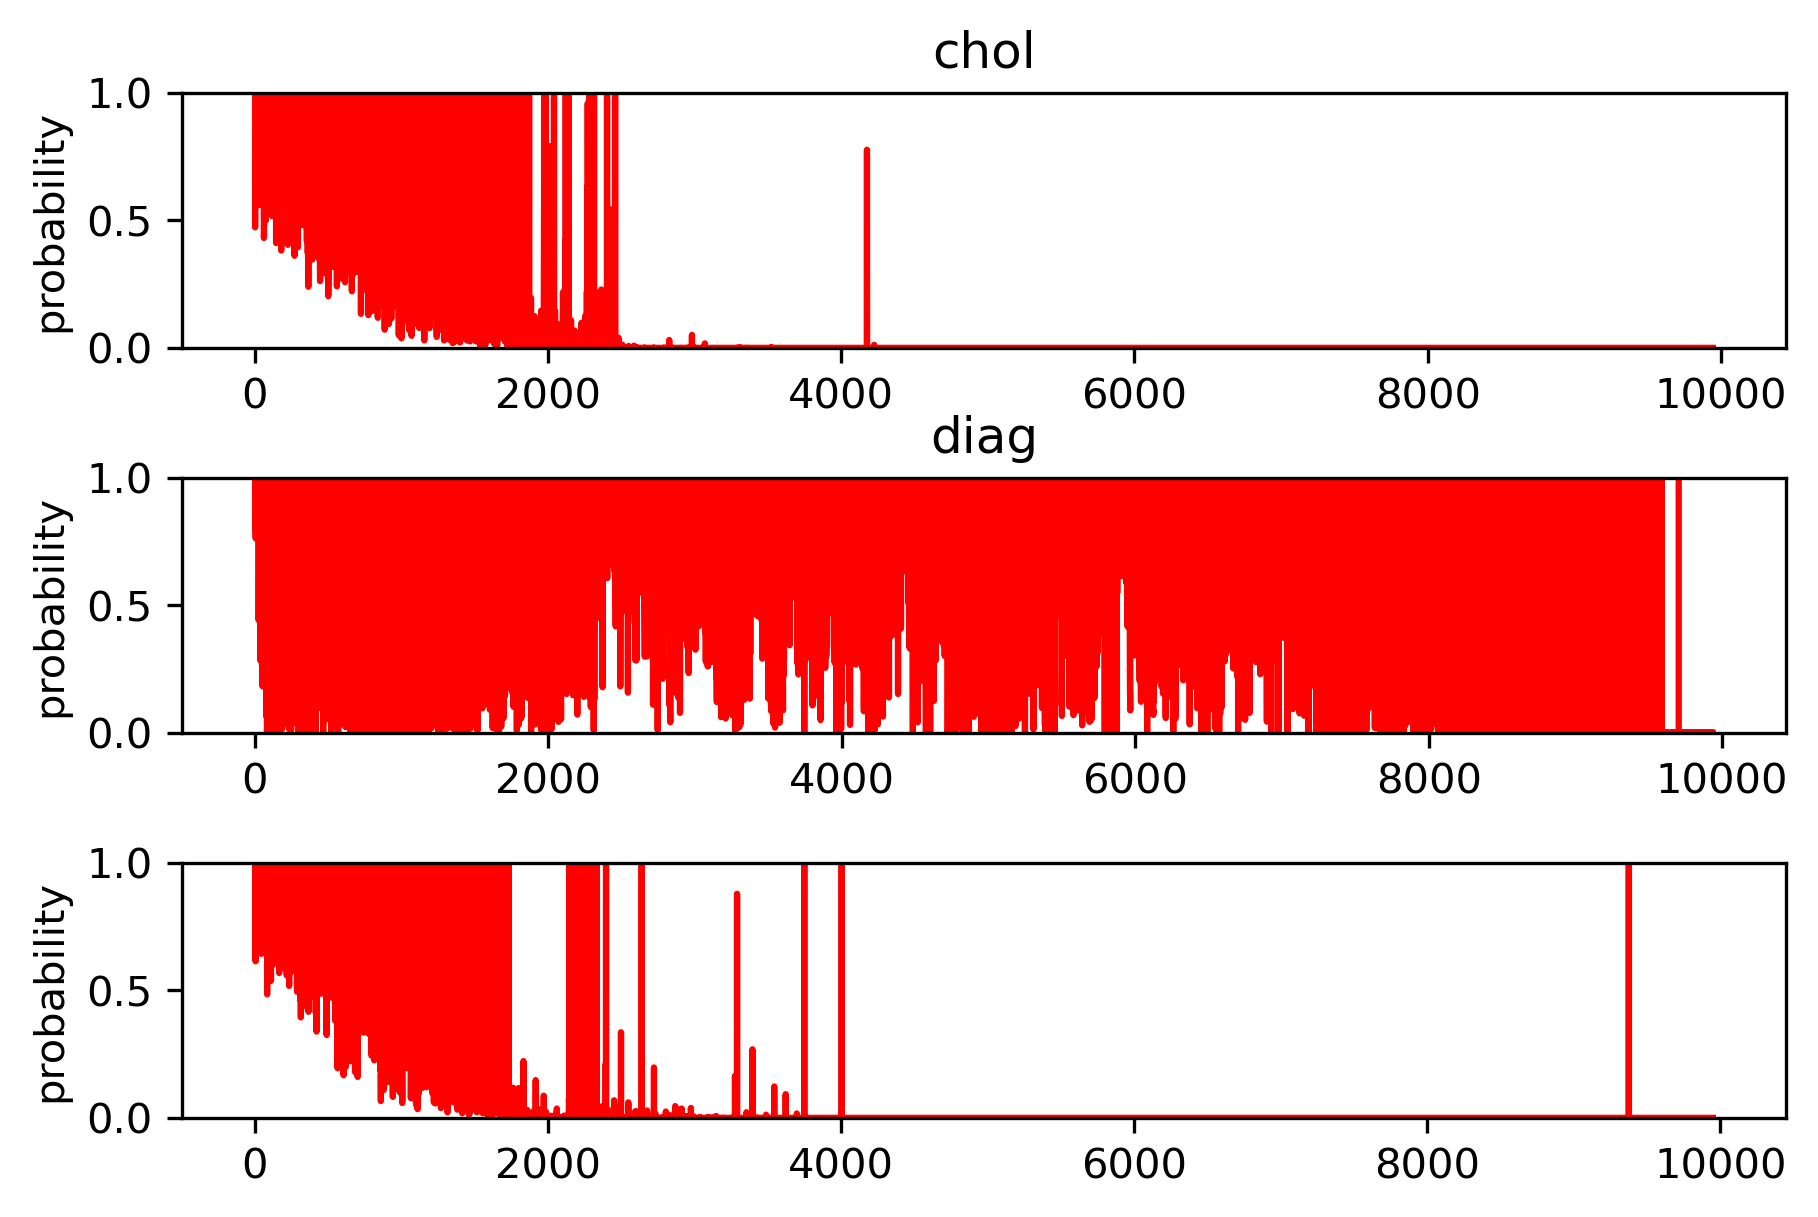

In [12]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)
plt.tight_layout()

axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("probability")
axs[1].set_ylabel("probability")
axs[2].set_ylabel("probability")

# Fancy temperature

In [ ]:
maximum_markov_chain_length = 250
random_seed = 1

## With Cholesky

In [ ]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", bound_enforcing_method=bound_enforcing_method,
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

## With diagonal thing

In [ ]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  , 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", 
                                  maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000, bound_enforcing_method=bound_enforcing_method)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

# Simple

In [ ]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

# Results

In [ ]:
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.accepted_objective_history_array[:, 1], rana_2d_chol.accepted_objective_history_array[:, 0], label="chol")
axs[1].plot(rana_2d_diag.accepted_objective_history_array[:, 1], rana_2d_diag.accepted_objective_history_array[:, 0], label="diag")
axs[2].plot(rana_2d.accepted_objective_history_array[:, 1], rana_2d.accepted_objective_history_array[:, 0], label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

In [ ]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].plot(temp_history_chol[:, 2], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].plot(temp_history_diag[:, 2], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].plot(temp_history[:, 2], temp_history[:, 0], label="simple")
plt.tight_layout()
axs[2].set_xlabel("n_function_evaluations")

In [ ]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)

# old

In [ ]:
fig, ax = plt.subplots(1)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
ax.plot(temp_history_chol[:, 1], temp_history_chol[:, 0])

In [ ]:
plt.plot(rana_2d_chol.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_chol.objective_history)

# Diag

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d_diag.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d_diag.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_diag.objective_history)

# Without any fancy step size stuff

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d.objective_history)